In [ ]:
# join knn  and pca ,

# 1) principal component analysis and k-NN classifier,
# 2) random forests,
# 3) stochastic gradient descent classifier,
# 4) multi-layer perceptron,
# 5) deep learning networks and
# 6) pre-trained networks.

In [42]:
import io
import os
import cv2
import glob
from shutil import copyfile
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# Import ResNet50 from tensorflow.keras.applications
from tensorflow.keras.applications import ResNet50
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import imageio
import skimage.color
from skimage.transform import resize





In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Show the Directories
SIZE = 128
images = []
labels = []


for directory_path in glob.glob("/content/drive/MyDrive/ML_IPData7/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img.flatten())
        labels.append(label)

Tennis racket
Table tennis racket
racket_classifier.h5
train
val


<ipython-input-40-2df695fe2f34>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/drive/MyDrive/ML_IPData7/Tennis racket/000001.jpg')


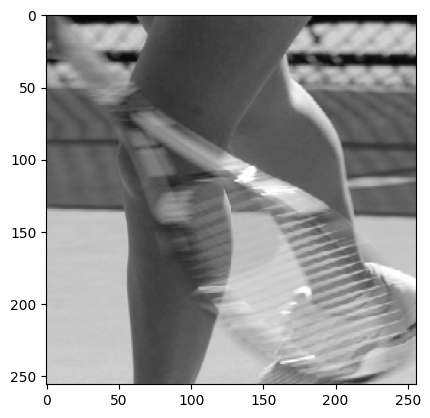

<ipython-input-40-2df695fe2f34>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread('/content/drive/MyDrive/ML_IPData7/Table tennis racket/000002.jpg')


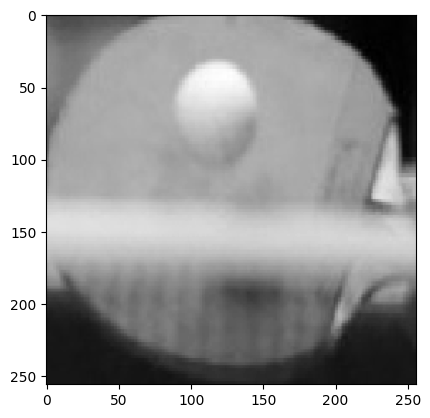

In [40]:
SIZE = 256

img = imageio.imread('/content/drive/MyDrive/ML_IPData7/Tennis racket/000001.jpg')
img = skimage.color.rgb2gray(img)
img = resize(img, (SIZE, SIZE), order=0)
plt.imshow(img, cmap='gray')
plt.show()


img2 = imageio.imread('/content/drive/MyDrive/ML_IPData7/Table tennis racket/000002.jpg')

img2 = skimage.color.rgb2gray(img2)

img2 = resize(img2, (SIZE, SIZE), order=0)
plt.imshow(img2, cmap='gray')
plt.show()

In [5]:
# 1 Pca model
images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [6]:


x_train = x_train.reshape(-1, SIZE, SIZE, 1)
x_test = x_test.reshape(-1, SIZE, SIZE, 1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(le.classes_))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(le.classes_))

In [7]:
#  normal code model
num_samples = len(y_test)
num_classes = y_test.shape[1]
predicted_probabilities = np.random.rand(num_samples, num_classes)

predicted_labels = np.argmax(predicted_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)


accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy}")



cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

print("\nWithout any algorithim:")
print(classification_report(true_labels, predicted_labels))

Accuracy: 0.4877384196185286
Confusion Matrix:
[[ 80  82]
 [106  99]]

Without any algorithim:
              precision    recall  f1-score   support

           0       0.43      0.49      0.46       162
           1       0.55      0.48      0.51       205

    accuracy                           0.49       367
   macro avg       0.49      0.49      0.49       367
weighted avg       0.50      0.49      0.49       367



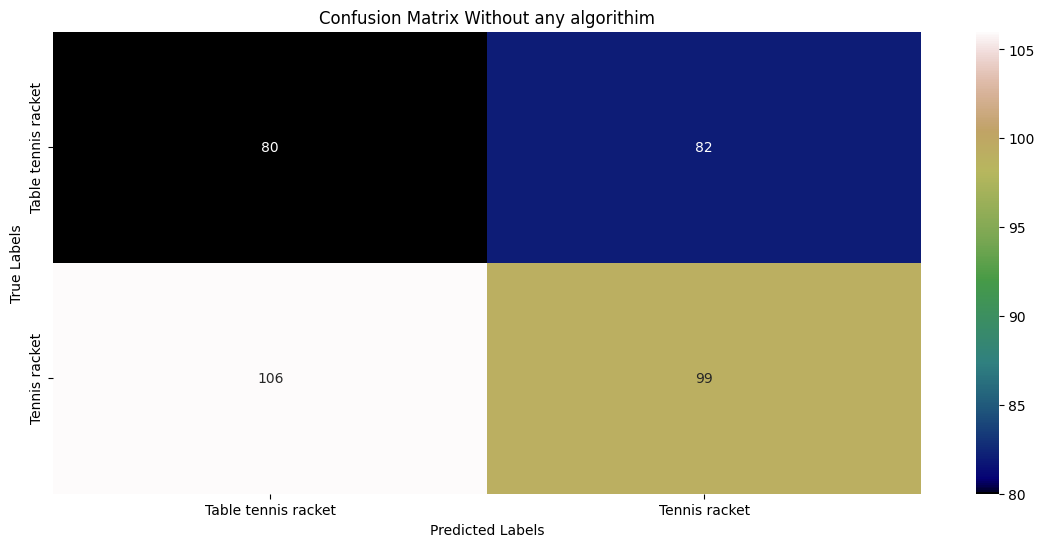

In [8]:
plt.figure(figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="gist_earth",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Without any algorithim")
plt.show()

In [9]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_pca.shape[1],)))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_pca, y_train, epochs=40, batch_size=32, validation_data=(x_test_pca, y_test))


loss, accuracy = model.evaluate(x_test_pca, y_test)
print(f"Test Accuracy: {accuracy}")


y_pred = model.predict(x_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5499 - loss: 196.0006 - val_accuracy: 0.6567 - val_loss: 85.9122
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7094 - loss: 58.9264 - val_accuracy: 0.6458 - val_loss: 71.3916
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8122 - loss: 27.5389 - val_accuracy: 0.6676 - val_loss: 64.3298
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 13.5128 - val_accuracy: 0.6649 - val_loss: 59.5896
Epoch 5/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8940 - loss: 7.3643 - val_accuracy: 0.6676 - val_loss: 57.7209
Epoch 6/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9225 - loss: 4.5263 - val_accuracy: 0.6594 - val_loss: 63.3006
Epoch 7/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 1.9170 - val_accuracy: 0.6540 - val_loss: 61.0263
Epoch 8/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9592 - loss: 1.3316 - val_accuracy: 0.664

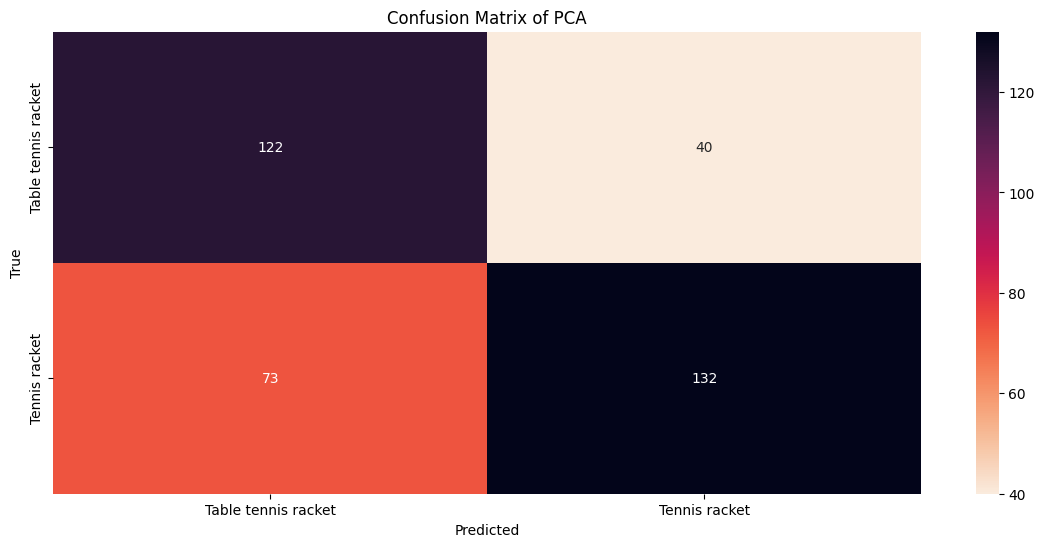

                     precision    recall  f1-score   support

Table tennis racket       0.63      0.75      0.68       162
      Tennis racket       0.77      0.64      0.70       205

           accuracy                           0.69       367
          macro avg       0.70      0.70      0.69       367
       weighted avg       0.70      0.69      0.69       367



In [10]:
plt.figure(figsize=(14, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rocket_r",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of PCA")
plt.show()

print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))


In [11]:
#5 Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)



Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.6478 - loss: 0.8263 - val_accuracy: 0.8992 - val_loss: 0.3050
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8744 - loss: 0.3256 - val_accuracy: 0.8937 - val_loss: 0.2636
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8946 - loss: 0.2742 - val_accuracy: 0.9155 - val_loss: 0.2274
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9336 - loss: 0.1792 - val_accuracy: 0.9155 - val_loss: 0.2312
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9385 - loss: 0.1613 - val_accuracy: 0.9019 - val_loss: 0.2566
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9520 - loss: 0.1336 - val_accuracy: 0.8910 - val_loss: 0.2584
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9570 - loss: 0.1227 - val_accuracy: 0.9046 - val_loss: 0.2617
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9650 - loss: 0.0994 - val_accuracy: 0.8910 -

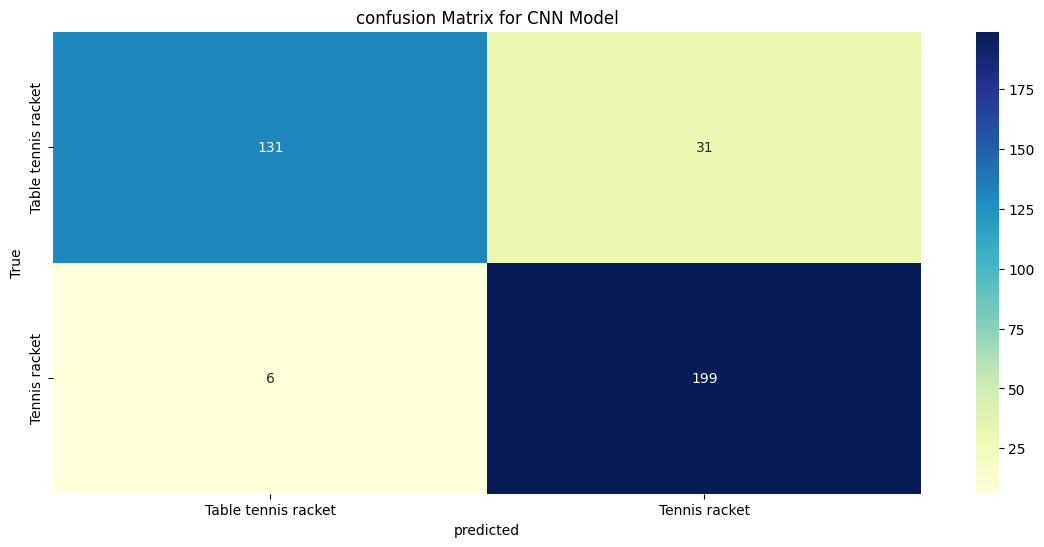

                     precision    recall  f1-score   support

Table tennis racket       0.96      0.81      0.88       162
      Tennis racket       0.87      0.97      0.91       205

           accuracy                           0.90       367
          macro avg       0.91      0.89      0.90       367
       weighted avg       0.91      0.90      0.90       367



In [13]:
plt.figure(figsize=(14, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("confusion Matrix for CNN Model")
plt.show()
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9794 - loss: 0.0633 - val_accuracy: 0.9046 - val_loss: 0.3317
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9813 - loss: 0.0514 - val_accuracy: 0.8965 - val_loss: 0.4124
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0329 - val_accuracy: 0.8992 - val_loss: 0.3962
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9914 - loss: 0.0307 - val_accuracy: 0.8856 - val_loss: 0.6454
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9760 - loss: 0.0751 - val_accuracy: 0.9074 - val_loss: 0.4639
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.8856 - val_loss: 0.4936
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9872 - loss: 0.0342 - val_accuracy: 0.8937 - val_loss: 0.5018
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9946 - loss: 0.0198 - val_accuracy: 0.8937 - v

In [15]:
# Check the model works properly or not.
def predict_image(image_path):

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"could not load image from path: {image_path}")

    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(-1, SIZE, SIZE, 1)
    img = img.astype('float32') / 255.0

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        return "Table Tennis Racket"
    else:
        return "Tennis Racket"

In [16]:

image_path = '/content/drive/MyDrive/ML_IPData7/Tennis racket/000001.jpg'
predicted_label = predict_image(image_path)
print(f"The image is predicted as: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
The image is predicted as: Tennis Racket


In [17]:
# 1.2 KNN classifer

label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train.argmax(axis=1))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train_numeric)

y_pred_prob = knn.predict_proba(x_test_pca)

y_pred_classes = np.argmax(y_pred_prob, axis=1)



In [18]:
print(classification_report(y_test,to_categorical(y_pred_classes, num_classes=y_test.shape[1])))



              precision    recall  f1-score   support

           0       0.59      0.81      0.68       162
           1       0.79      0.55      0.65       205

   micro avg       0.66      0.66      0.66       367
   macro avg       0.69      0.68      0.66       367
weighted avg       0.70      0.66      0.66       367
 samples avg       0.66      0.66      0.66       367



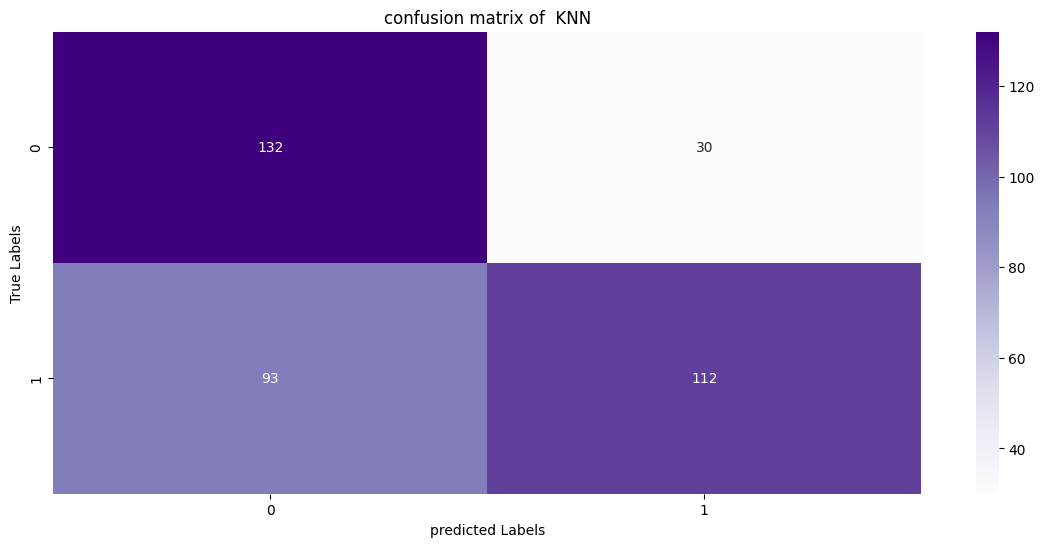

In [19]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)
plt.figure(figsize=(14, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("confusion matrix of  KNN")
plt.show()

In [20]:
# 2 Random forests
#  parameter change
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_pca, y_train_numeric)

y_pred_rf = rf_classifier.predict(x_test_pca)

y_pred_rf_onehot = to_categorical(y_pred_rf, num_classes=y_test.shape[1])



In [21]:
accuracy_rf = accuracy_score(y_test, y_pred_rf_onehot)
print(f"Random forest accuracy: {accuracy_rf}")



Random forest accuracy: 0.7411444141689373


In [22]:

print(classification_report(y_test, y_pred_rf_onehot))



              precision    recall  f1-score   support

           0       0.74      0.63      0.68       162
           1       0.74      0.83      0.78       205

   micro avg       0.74      0.74      0.74       367
   macro avg       0.74      0.73      0.73       367
weighted avg       0.74      0.74      0.74       367
 samples avg       0.74      0.74      0.74       367



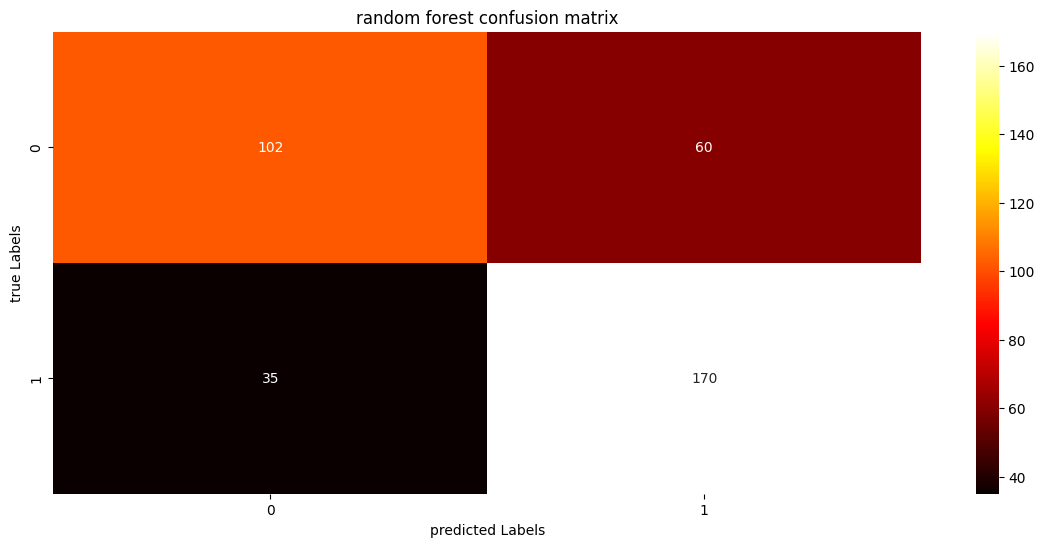

In [23]:
conf_matrix_rf = confusion_matrix(y_test.argmax(axis=1), y_pred_rf)
plt.figure(figsize=(14, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="hot",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("predicted Labels")
plt.ylabel("true Labels")
plt.title("random forest confusion matrix")
plt.show()

In [24]:
# 3  stochastic gradient descent classifier

sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', max_iter=2000, random_state=42)
sgd_classifier.fit(x_train_pca, y_train_numeric)

y_pred_sgd = sgd_classifier.predict(x_test_pca)

y_pred_sgd_onehot = to_categorical(y_pred_sgd, num_classes=y_test.shape[1])
accuracy_sgd = accuracy_score(y_test, y_pred_sgd_onehot)


In [25]:
print(f"SGD classi acc: {accuracy_sgd}")


print(classification_report(y_test, y_pred_sgd_onehot))



SGD classi acc: 0.6893732970027248
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       162
           1       0.77      0.63      0.69       205

   micro avg       0.69      0.69      0.69       367
   macro avg       0.70      0.70      0.69       367
weighted avg       0.71      0.69      0.69       367
 samples avg       0.69      0.69      0.69       367



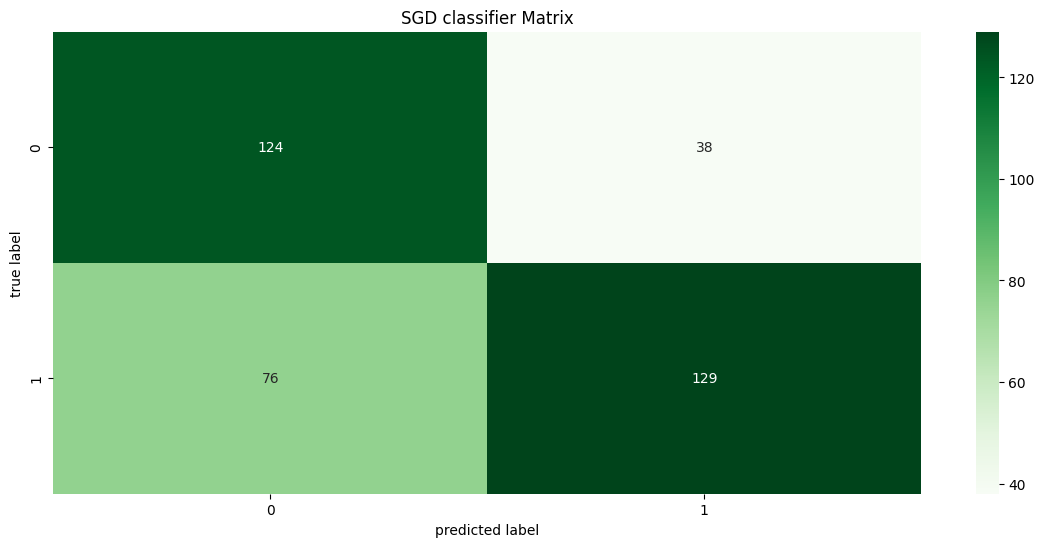

In [26]:
conf_matrix_sgd = confusion_matrix(y_test.argmax(axis=1), y_pred_sgd)
plt.figure(figsize=(14, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt="d", cmap="Greens",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("SGD classifier Matrix")
plt.show()

In [27]:
# 4  multi-layer perceptron

mmodel = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])
y_test_numeric = np.argmax(y_test, axis=1)

mmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = mmodel.fit(x_train_pca, y_train_numeric, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = mmodel.evaluate(x_test_pca, y_test_numeric)
print(f"MLP Test Loss: {loss:.4f}")
print(f"MLP Test Accuracy: {accuracy:.4f}")

y_pred_mlp = np.argmax(mmodel.predict(x_test_pca), axis=1)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.5453 - loss: 112.5036 - val_accuracy: 0.6939 - val_loss: 15.5884
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 45.9166 - val_accuracy: 0.6122 - val_loss: 10.1400
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6445 - loss: 26.8279 - val_accuracy: 0.6905 - val_loss: 5.9748
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - loss: 17.0900 - val_accuracy: 0.6701 - val_loss: 3.2227
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - loss: 12.5968 - val_accuracy: 0.6395 - val_loss: 1.8748
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6044 - loss: 10.4214 - val_accuracy: 0.6701 - val_loss: 0.9777
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6369 - loss: 5.5917 - val_accuracy: 0.6224 - val_loss: 0.7749
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5691 - loss: 4.7038 - val_accuracy: 0.6803 - val_loss

In [28]:
print(classification_report(y_test_numeric, y_pred_mlp))



              precision    recall  f1-score   support

           0       0.81      0.49      0.61       162
           1       0.69      0.91      0.79       205

    accuracy                           0.72       367
   macro avg       0.75      0.70      0.70       367
weighted avg       0.75      0.72      0.71       367



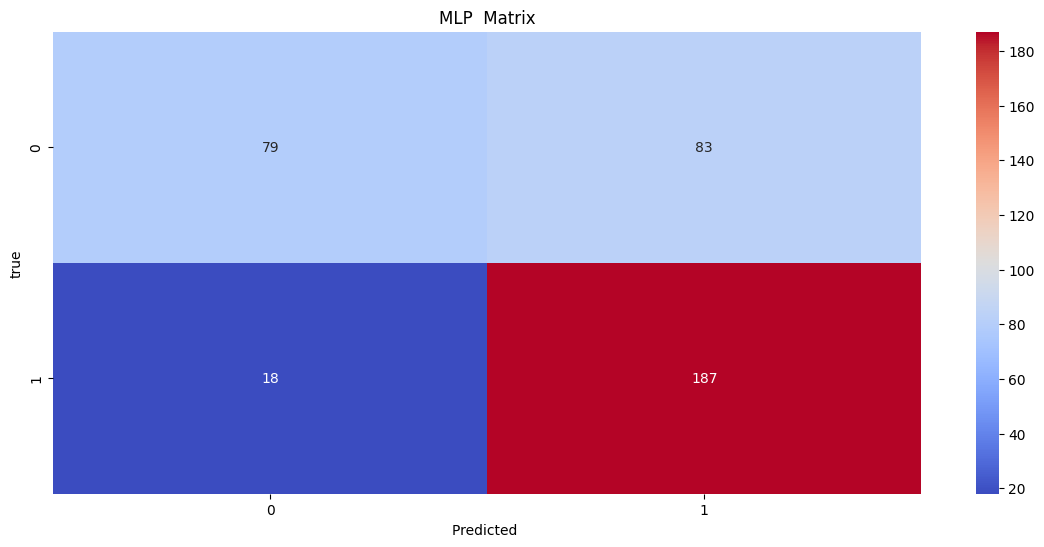

In [29]:
conf_matrix_mlp = confusion_matrix(y_test_numeric, y_pred_mlp)
plt.figure(figsize=(14, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted ")
plt.ylabel("true")
plt.title("MLP  Matrix")
plt.show()

In [44]:
# pre trianed model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)

pretrained_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

pretrained_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

SIZE = 128

x_train_reshaped = x_train.reshape(-1, SIZE, SIZE, 1)
x_test_reshaped = x_test.reshape(-1, SIZE, SIZE, 1)

x_train_rgb = np.repeat(x_train_reshaped, 3, axis=-1)
x_test_rgb = np.repeat(x_test_reshaped, 3, axis=-1)

history_pretrained = pretrained_model.fit(x_train_rgb, y_train_numeric, epochs=10, batch_size=32, validation_split=0.2)

loss_pretrained, accuracy_pretrained = pretrained_model.evaluate(x_test_rgb, y_test_numeric)
print(f"Pretrained Model  loss: {loss_pretrained:.4f}")
print(f"Pretrained Model accuracy: {accuracy_pretrained:.4f}")



Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 381ms/step - accuracy: 0.5884 - loss: 0.6730 - val_accuracy: 0.7211 - val_loss: 0.5207
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7126 - loss: 0.5251 - val_accuracy: 0.7653 - val_loss: 0.4674
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7668 - loss: 0.4806 - val_accuracy: 0.7925 - val_loss: 0.4892
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7990 - loss: 0.4457 - val_accuracy: 0.8061 - val_loss: 0.4331
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8208 - loss: 0.4031 - val_accuracy: 0.8095 - val_loss: 0.4201
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8117 - loss: 0.4186 - val_accuracy: 0.7959 - val_loss: 0.4101
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7922 - loss: 0.4425 - val_accuracy: 0.8367 - val_loss: 0.3845
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8227 - loss: 0.4128 - val_accuracy: 0.8435 -

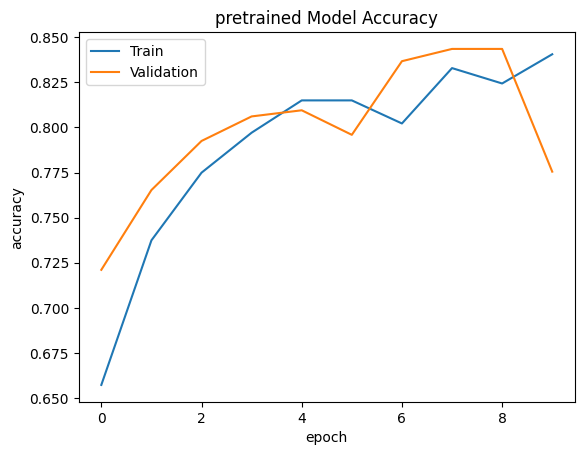

In [45]:

plt.plot(history_pretrained.history['accuracy'])
plt.plot(history_pretrained.history['val_accuracy'])
plt.title('pretrained Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



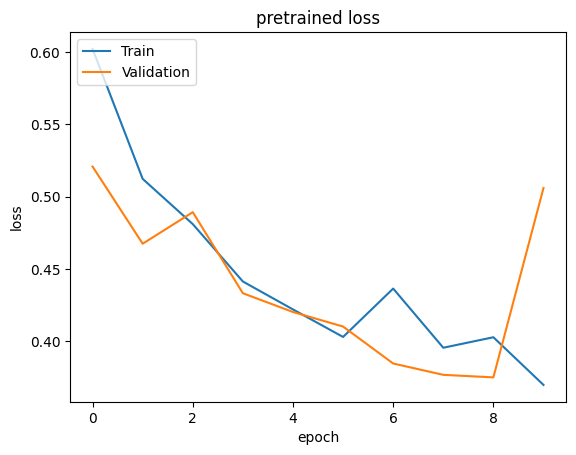

In [46]:
plt.plot(history_pretrained.history['loss'])
plt.plot(history_pretrained.history['val_loss'])
plt.title('pretrained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       162
           1       0.92      0.60      0.73       205

    accuracy                           0.75       367
   macro avg       0.79      0.77      0.75       367
weighted avg       0.80      0.75      0.75       367



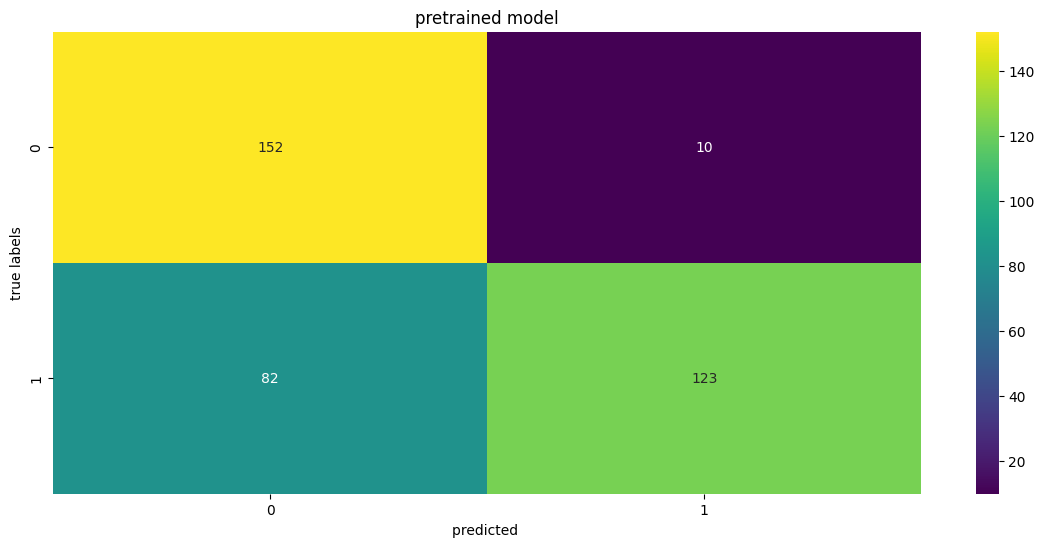

In [47]:

y_pred_pretrained = np.argmax(pretrained_model.predict(x_test_rgb), axis=1)


conf_matrix_pretrained = confusion_matrix(y_test_numeric, y_pred_pretrained)
print(classification_report(y_test_numeric, y_pred_pretrained))

plt.figure(figsize=(14, 6))

sns.heatmap(conf_matrix_pretrained, annot=True, fmt="d", cmap="viridis",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("predicted ")
plt.ylabel("true labels")
plt.title("pretrained model")
plt.show()

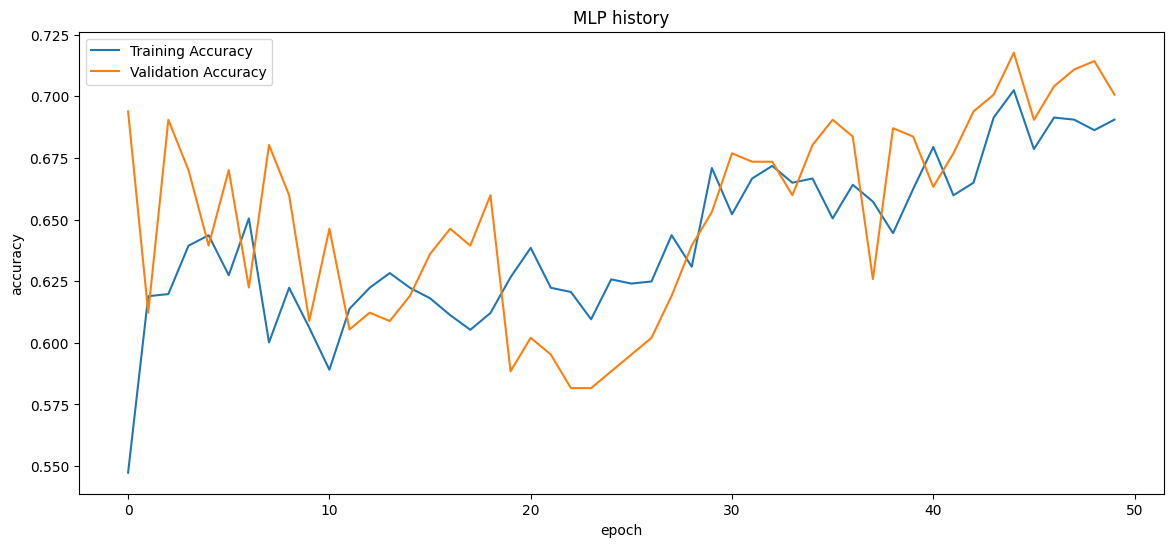

In [48]:
# Deep learning networks

plt.figure(figsize=(14, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('MLP history')
plt.legend()
plt.show()



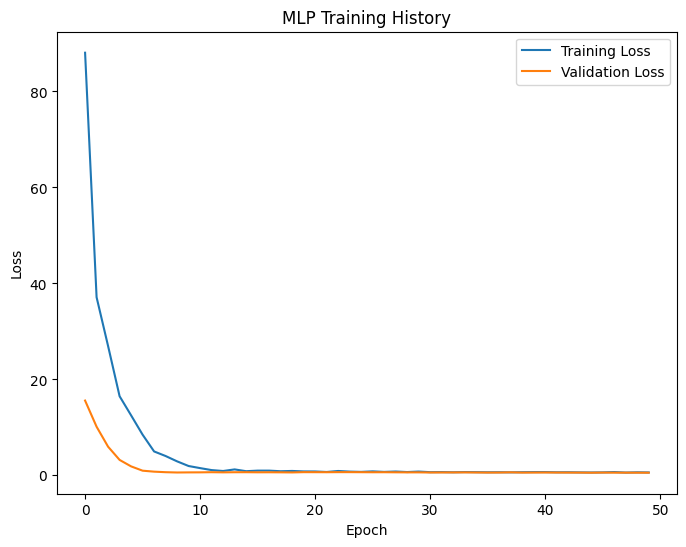

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training History')
plt.legend()
plt.show()